In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.theory.graphTools import treeToBrackets

### Create element from old string format

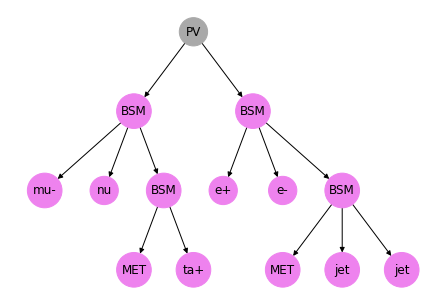

Name= 1110101101000110101101010000


In [2]:
elementStr = "[[['e+','e-'],['jet','jet']],[['mu-','nu'],['ta+']]]"
el = Element(info=elementStr)
el.drawTree()
print('Name=',el.getCanonName())

In [3]:
print(el)

(PV > anyOdd(1),anyOdd(2)), (anyOdd(1) > mu-,nu,anyOdd(3)), (anyOdd(2) > e+,e-,anyOdd(4)), (anyOdd(3) > MET,ta+), (anyOdd(4) > MET,jet,jet)


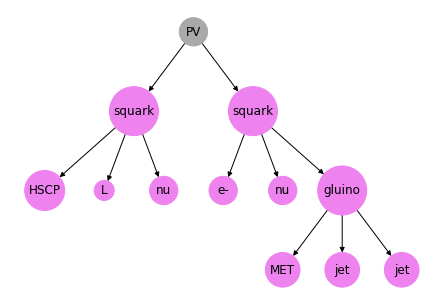

Name= 111010100110101101010000


In [4]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
finalStates=['MET','HSCP']
intermediateStates=[['squark','gluino'],['squark']]
el = Element(info=stringEl,finalState=finalStates,intermediateState=intermediateStates)
el.drawTree()
print('Name=',el.getCanonName())

### Create element from new string format

In [5]:
elementStr = str(el)
print(elementStr)

(PV > squark(1),squark(2)), (squark(1) > HSCP,L,nu), (squark(2) > e-,nu,gluino(3)), (gluino(3) > MET,jet,jet)


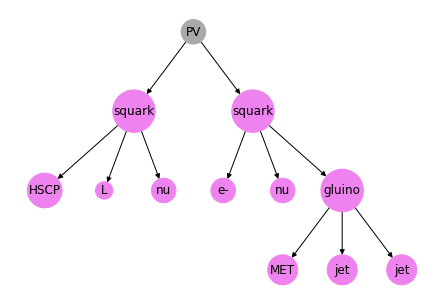

Name= 111010100110101101010000


In [6]:
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.getCanonName())

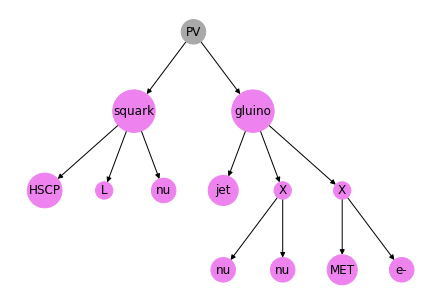

Name= 11101010011011010011010000


In [7]:
elementStr = proc = '(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > HSCP,L,nu), (X(3) > nu,nu), (X(4) > MET,e-)'
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.getCanonName())

In [8]:
print(el)

(PV > squark(1),gluino(2)), (squark(1) > HSCP,L,nu), (gluino(2) > jet,X(3),X(4)), (X(3) > nu,nu), (X(4) > MET,e-)


### Create element using a model

In [9]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(inputFile=slhafile, BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles()


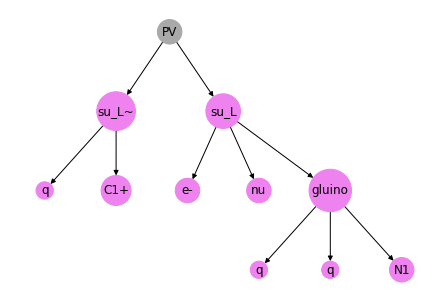

In [10]:
stringEl = "(PV > su_L(1),su_L~(2)), (su_L(1) > gluino(3),e-,nu), (su_L~(2) > C1+,d), (gluino(3) > N1,u,u~)"
el = Element(info=stringEl,model=model)
el.drawTree(nodeScale=3)

#### Draw tree using distinct property for labels

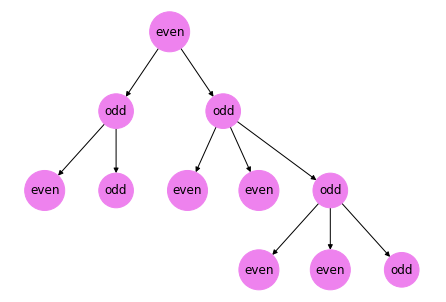

In [11]:
el.drawTree(nodeScale=4,labelAttr='Z2parity')

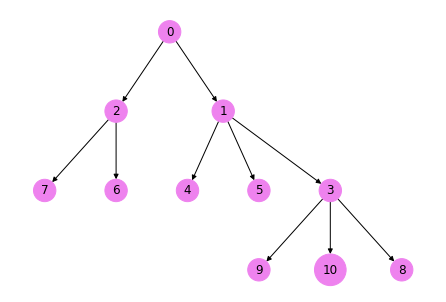

In [12]:
el.drawTree(nodeScale=5,labelAttr='node')

#### Convert to old bracket notation

In [13]:
elB,finalState,intermediateState = treeToBrackets(el.tree)
print(elB)
print(finalState)
print(intermediateState)

[[['q']], [['e-', 'nu'], ['q', 'q']]]
['C1+', 'N1']
[['su_L~'], ['su_L', 'gluino']]


### Get attributes from nodes

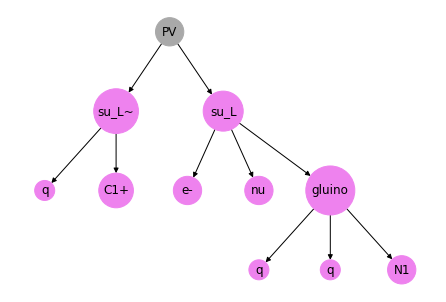

In [14]:
el.drawTree()

In [16]:
masses = list(zip(el.tree.nodes(),el.mass))
print(masses)

[(PV, None), (su_L~, 5.05E+03 [GeV]), (su_L, 5.05E+03 [GeV]), (e-, 5.00E-01 [MeV]), (nu, 0.00E+00 [MeV]), (gluino, 5.77E+02 [GeV]), (q, 0.00E+00 [MeV]), (C1+, 1.34E+02 [GeV]), (q, 0.00E+00 [MeV]), (q, 0.00E+00 [MeV]), (N1, 6.81E+01 [GeV])]


In [17]:
pdgs = list(zip(el.tree.nodes(),el.pdg))
print(pdgs)

[(PV, None), (su_L~, -1000002), (su_L, 1000002), (e-, 11), (nu, [12, 14, 16, -12, -14, -16]), (gluino, 1000021), (q, [-2, 1, 3, -1, -3, 2]), (C1+, 1000024), (q, [-2, 1, 3, -1, -3, 2]), (q, [-2, 1, 3, -1, -3, 2]), (N1, 1000022)]


In [18]:
Z2parity = list(zip(el.tree.nodes(),el.Z2parity))
print(Z2parity)

[(PV, None), (su_L~, 'odd'), (su_L, 'odd'), (e-, 'even'), (nu, 'even'), (gluino, 'odd'), (q, 'even'), (C1+, 'odd'), (q, 'even'), (q, 'even'), (N1, 'odd')]
